In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

_____

# 1. Data

In [ ]:
train = pd.read_csv('olympics_train.csv')
test = pd.read_csv('olympics_test.csv')
train.shape, test.shape

((216892, 15), (54224, 14))

# 2. Preprocesamiento

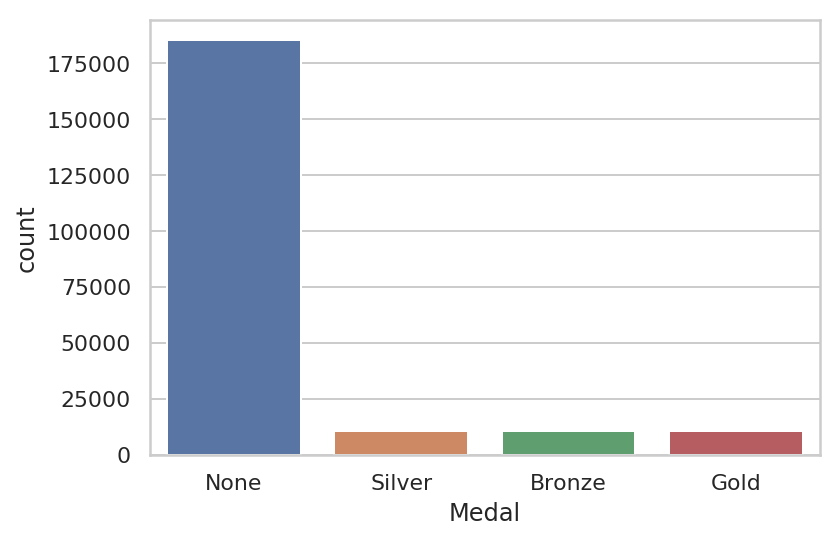

In [ ]:
sns.countplot(train.Medal)

In [ ]:
train.Medal.value_counts()

None      185111
Gold       10653
Bronze     10639
Silver     10489
Name: Medal, dtype: int64

Valores faltantes

In [ ]:
df_null = pd.DataFrame(train.isnull().sum())
df_null

,0
ID,0
Name,0
Sex,0
Age,7606
Height,48071
Weight,50256
Team,0
NOC,0
Games,0
Year,0


In [ ]:
df_null[df_null[0]>10000]

,0
Height,48071
Weight,50256


In [ ]:
df_null.style.bar()

,0
ID,0
Name,0
Sex,0
Age,7606
Height,48071
Weight,50256
Team,0
NOC,0
Games,0
Year,0


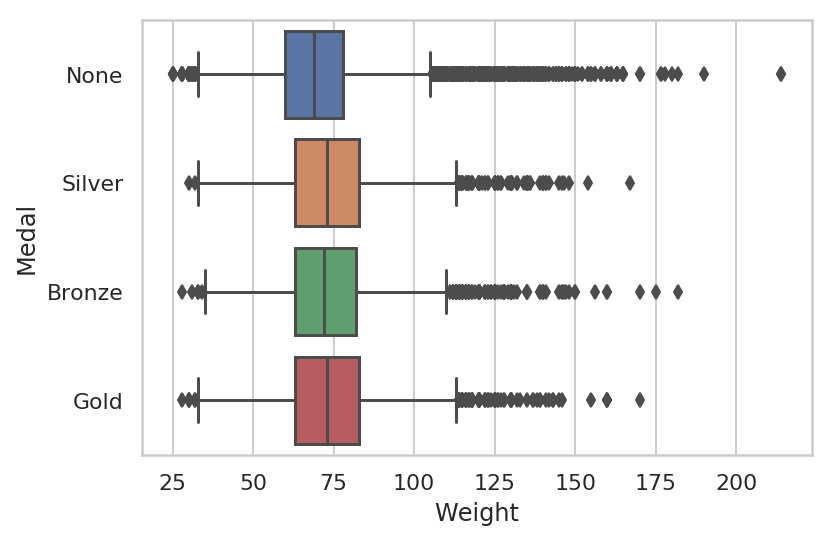

In [ ]:
sns.boxplot(x='Weight', y='Medal', data=train)

In [ ]:
train.Weight = train.Weight.fillna(np.mean(train.Weight))
train.Age = train.Age.fillna(np.mean(train.Weight))
train.Height = train.Height.fillna(np.mean(train.Weight))

In [ ]:
test.Weight = test.Weight.fillna(np.mean(train.Weight))
test.Age = test.Age.fillna(np.mean(train.Weight))
test.Height = test.Height.fillna(np.mean(train.Weight))

In [ ]:
train_numcols = list(train._get_numeric_data().columns)

In [ ]:
train_cols = train.columns

In [ ]:
train_cats = list(set(train_cols) - set(train_numcols))
train_cats

['Medal',
 'Games',
 'City',
 'Team',
 'Sport',
 'Name',
 'Season',
 'Sex',
 'NOC',
 'Event']

In [ ]:
train[train_cats].describe()

,Medal,Games,City,Team,Sport,Name,Season,Sex,NOC,Event
count,216892,216892,216892,216892,216892,216892,216892,216892,216892,216892
unique,4,51,42,1142,66,117904,2,2,229,765
top,None,2000 Summer,London,United States,Athletics,Robert Tait McKenzie,Summer,M,USA,Football Men's Football
freq,185111,11101,17879,14324,31013,42,177917,157234,15158,4570


In [ ]:
train_cats.remove('Medal')

In [ ]:
test[train_cats].describe()

,Games,City,Team,Sport,Name,Season,Sex,NOC,Event
count,54224,54224,54224,54224,54224,54224,54224,54224,54224
unique,51,42,752,64,43160,2,2,228,735
top,1996 Summer,London,United States,Athletics,Robert Tait McKenzie,Summer,M,USA,Football Men's Football
freq,2796,4547,3523,7611,16,44635,39360,3695,1163


In [ ]:
train.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
35463,121459,Thodule Toulotte,M,21.0,169.0,62.0,France,FRA,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",None
16160,62338,Gennady Viktorovich Komnatov,M,22.0,173.0,73.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Cycling,Cycling Men's 100 kilometres Team Time Trial,Gold
51030,73945,Romana Malov,F,29.0,164.0,56.0,Czech Republic,CZE,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Pole Vault,None
180529,55208,Jan Edvin Johansson,M,28.0,182.0,80.0,Sweden,SWE,1972 Winter,1972,Winter,Sapporo,Bobsleigh,Bobsleigh Men's Two,None
91274,77181,Joseph M'Bouroukounda,M,33.0,169.0,57.0,Gabon,GAB,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Featherweight,None


In [ ]:
train_numcols.remove('ID')

In [ ]:
train_cats.remove('Name')

In [ ]:
train = train.drop(['ID', 'Name'], axis=1)
test.drop(['ID', 'Name'], axis=1, inplace=True)
train.shape, test.shape

((216892, 13), (54224, 12))

In [ ]:
from sklearn import preprocessing

In [ ]:
lencoders = {}
for col in train_cats:
  le = preprocessing.LabelEncoder()
  train[col] = train[col].astype(str)
  test[col] = test[col].astype(str)
  labels = list(train[col]) + list(test[col])
  le.fit(labels)
  train[col] = le.transform(train[col].values)
  test[col] = le.transform(test[col].values)
  lencoders[col] = le

In [ ]:
train.sample(5)

,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
169045,1,25.0,196.000000,95.000000,809,162,23,1964,0,39,8,159,None
41662,1,29.0,70.708212,70.708212,173,36,4,1908,0,17,33,412,Gold
16857,1,34.0,175.000000,65.000000,513,104,44,2004,0,3,19,274,None
200680,1,23.0,173.000000,65.000000,1087,66,37,1992,0,5,54,639,None
1570,0,22.0,169.000000,62.000000,655,130,25,1968,0,20,62,711,None


# 3. Baseline

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = train.drop(['Medal'], axis=1)
y = train['Medal'].values
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

In [ ]:
y_pred = dt.predict(X)
f1_score(y, y_pred, average='weighted')

0.9988290425317677

In [ ]:
train.Medal.unique()

array(['None', 'Silver', 'Bronze', 'Gold'], dtype=object)

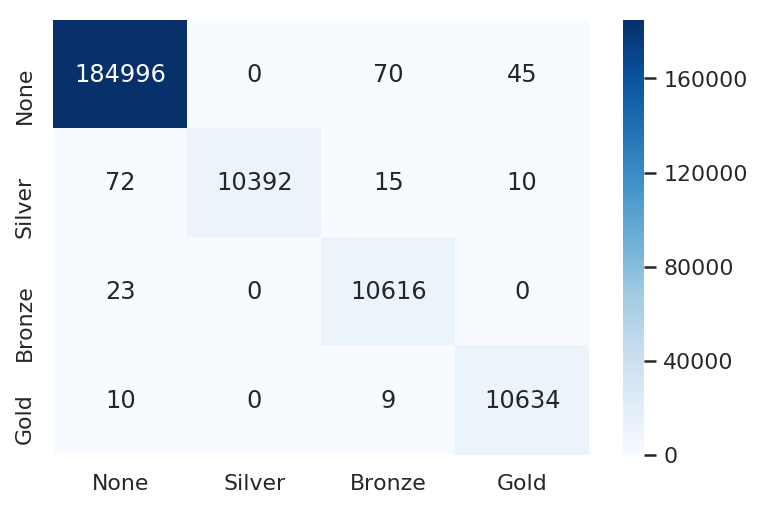

In [ ]:
labels = ['None', 'Silver', 'Bronze', 'Gold']
cm = confusion_matrix(y, y_pred, labels)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

In [ ]:
test_v2 = pd.read_csv('olympics_test.csv')

In [ ]:
y_pred_test = dt.predict(test)

In [ ]:
df = pd.DataFrame({'Id': test_v2.index, 'Medal': y_pred_test})


In [ ]:
df.to_csv('submission3.csv', index=False)

In [ ]:
df.head()

,Id,Medal
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None


# 4. FE

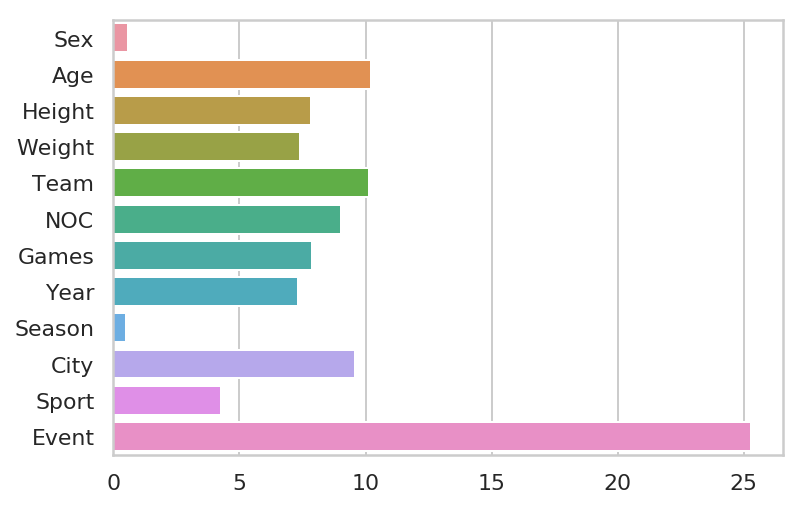

In [ ]:
sns.barplot(x=dt.feature_importances_*100, y=X.columns)

In [ ]:
train = train.drop(['Sex', 'Season'], axis=1)
test = test.drop(['Sex', 'Season'], axis=1)

In [ ]:
dt.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
dt.tree_.max_depth

44

In [ ]:
X = train.drop(['Medal'], axis=1)
y = train['Medal'].values
dt2 = DecisionTreeClassifier(max_depth=33, min_samples_leaf=3, min_samples_split=4)
dt2.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=33,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt2.predict(X)
f1_score(y, y_pred, average='weighted')

0.93929065841864

In [ ]:
y_pred_test = dt2.predict(test)
df = pd.DataFrame({'Id': test_v2.index, 'Medal': y_pred_test})

In [ ]:
df.to_csv('submission_v3.csv', index=False)

In [ ]:
### Hacer un for 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt3 = DecisionTreeClassifier(max_depth=33, min_samples_leaf=3, min_samples_split=4)

In [ ]:
gs = GridSearchCV(estimator=dt3, param_grid={'max_depth': list(range(20, 50))}, cv=4)

In [ ]:
gs.fit(X, y)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=3,
                                              min_samples_split=4,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                       30, 31, 32, 33, 34

In [ ]:
test.shape, train.shape

((54224, 10), (216892, 11))

In [ ]:
gs.cv_results_['mean_test_score']

array([0.87271545, 0.87102337, 0.8691653 , 0.86754237, 0.86645888,
       0.86529701, 0.8646792 , 0.86423197, 0.86340667, 0.86338823,
       0.86310237, 0.86280269, 0.86263209, 0.86274736, 0.86266898,
       0.86266898, 0.86271047, 0.86271969, 0.86285801, 0.86288107,
       0.86281652, 0.86281191, 0.86295945, 0.8628949 , 0.86274275,
       0.86283957, 0.86288568, 0.862941  , 0.86262287, 0.8625491 ])

In [ ]:
gs.cv_results_['std_test_score']

array([0.00569254, 0.00536979, 0.00567364, 0.00550109, 0.00518187,
       0.00523162, 0.00544016, 0.00518356, 0.00577287, 0.00579408,
       0.00568246, 0.00567807, 0.0057748 , 0.0055251 , 0.00589742,
       0.00586222, 0.005554  , 0.00578246, 0.00561234, 0.00546064,
       0.00541544, 0.00545098, 0.00559068, 0.00560906, 0.00557401,
       0.0051848 , 0.00562229, 0.00556488, 0.00566509, 0.00571908])

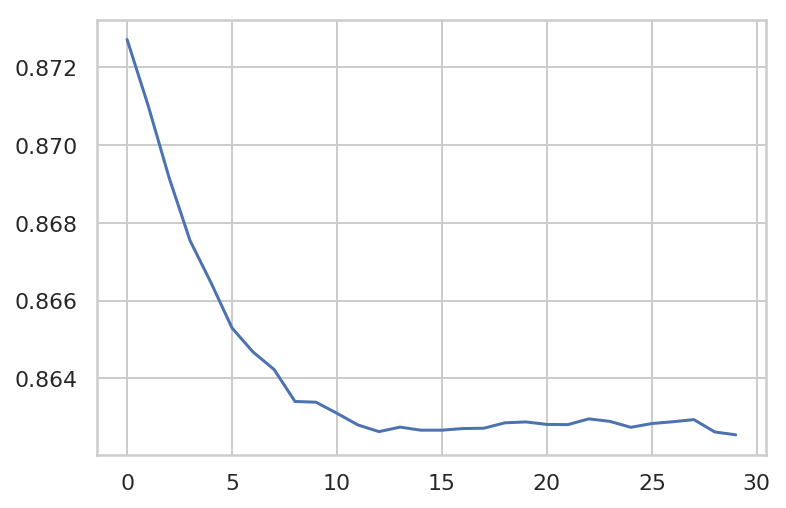

In [ ]:
plt.plot(gs.cv_results_['mean_test_score'])

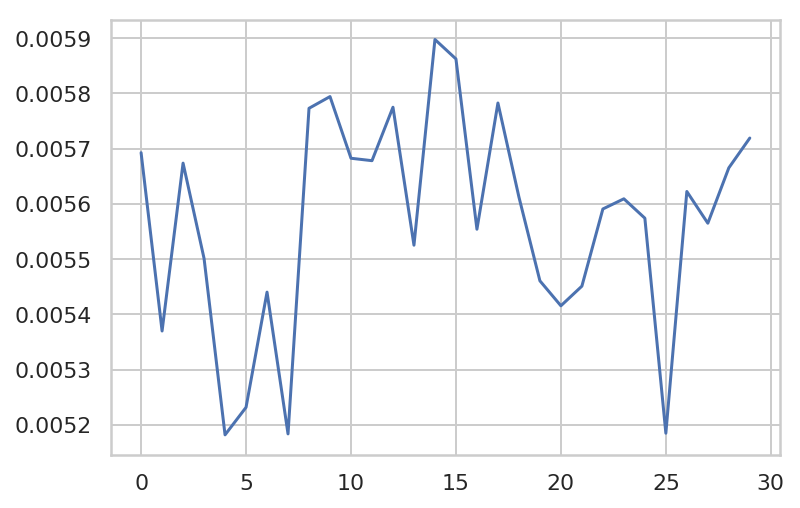

In [ ]:
plt.plot(gs.cv_results_['std_test_score'])

In [ ]:
X = train.drop(['Medal'], axis=1)
y = train['Medal'].values
dt3 = DecisionTreeClassifier(max_depth=24, min_samples_leaf=3, min_samples_split=4)
dt3.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=24,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt3.predict(X)
f1_score(y, y_pred, average='weighted')

0.9285759226655108

In [ ]:
y_pred_test = dt3.predict(test)
df = pd.DataFrame({'Id': test_v2.index, 'Medal': y_pred_test})

In [ ]:
df.to_csv('submission_v4.csv', index=False)